# Кластеризация

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

https://scikit-learn.org/stable/modules/clustering.html

## Kmeans

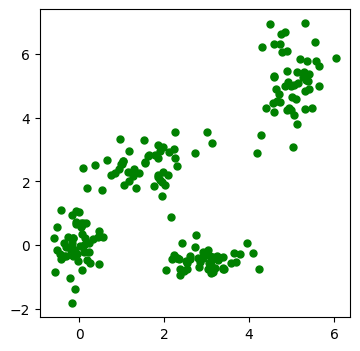

In [41]:
X = np.zeros((200, 2))
np.random.seed(seed=42)

X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.7, size=50)

X[50:100, 0] = np.random.normal(loc=3, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-0.5, scale=0.3, size=50)

X[100:150, 0] = np.random.normal(loc=1.5, scale=0.7, size=50)
X[100:150, 1] = np.random.normal(loc=2.5, scale=0.5, size=50)

X[150:200, 0] = np.random.normal(loc=5, scale=0.5, size=50)
X[150:200, 1] = np.random.normal(loc=5, scale=0.9, size=50)

plt.figure(figsize=(4,4))
plt.plot(X[:, 0], X[:, 1], 'go', markersize=5);

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

## k-means++ инициализирует центроиды на основе плотности точек для быстрой сходимости
## рекомендуется примерно всегда (по умолчанию)

kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

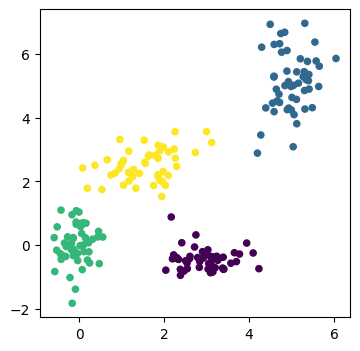

In [43]:
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=20)

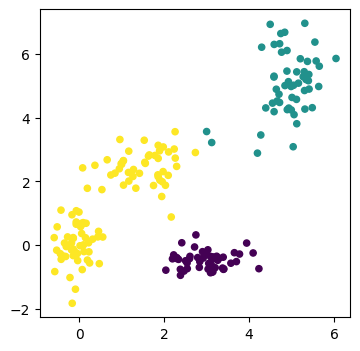

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=20)

### Метод локтя

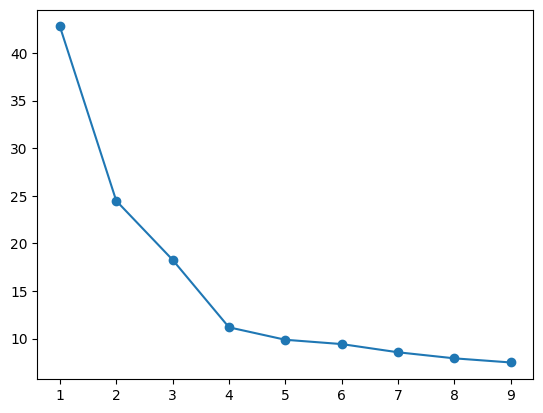

In [45]:
# метрика оценки качества кластеризации в алгоритме k-means
# сумма кв. расстояний между объектами и центрами их кластеров

inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertias, marker='o');

## Агломеративная кластеризация

Процесс объединения можно изобразить в виде дендрограммы.

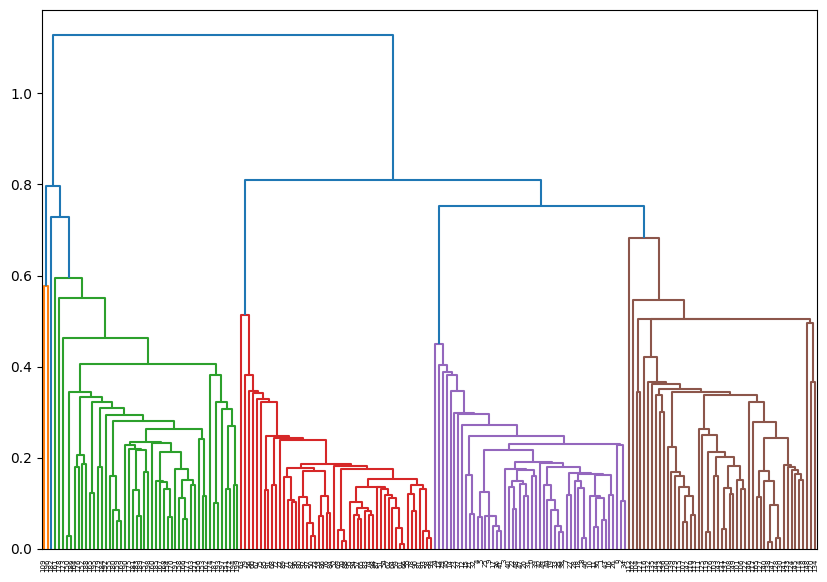

In [46]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X)

Z = hierarchy.linkage(distance_mat, 'single') # Агломеративная кластеризация

plt.figure(figsize=(10, 7))
dn = hierarchy.dendrogram(Z, color_threshold=0.7)

## DBSCAN

In [47]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.8, min_samples=5).fit(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 1


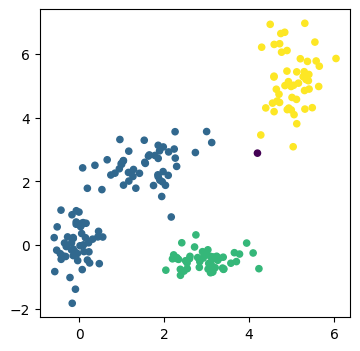

In [48]:
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, s=20)

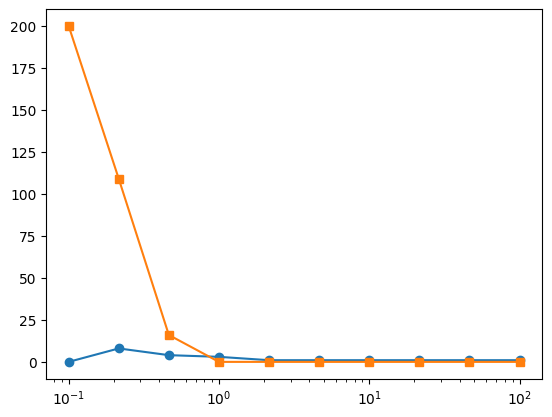

In [49]:
clusters, noise = [], []

R = np.logspace(-1, 2, 10)

for i in R:
    db = DBSCAN(eps=i, min_samples=5).fit(X)
    labels = db.labels_
    clusters.append(len(set(labels)) - (1 if -1 in labels else 0))
    noise.append(list(labels).count(-1))

plt.plot(R,clusters, marker='o')
plt.plot(R,noise, marker='s')
plt.xscale('log')

## load_digits

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

(1797, 64)


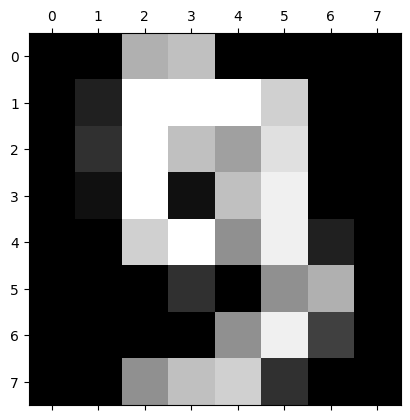

In [50]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

plt.matshow(digits.images[9], cmap="gray")
plt.show()

In [51]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

X, y = digits.data, digits.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, init='random', random_state=42))
algorithms.append(KMeans(n_clusters=10, init='k-means++', random_state=42))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(DBSCAN(eps=24, min_samples=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_), # Homogenity + Completeness
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data,
                       columns=['ARI', 'AMI', 'Homogenity',
                                'Completeness', 'V-measure', 'Silhouette'],
                       index=['K-means', 'K-means++', 'Agglomerative', 'DBSCAN'])
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.663415,0.734822,0.733744,0.741222,0.737464,0.182236
K-means++,0.725814,0.772741,0.773434,0.776566,0.774997,0.176474
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497
DBSCAN,0.404979,0.685843,0.623897,0.771520,0.689900,0.086262


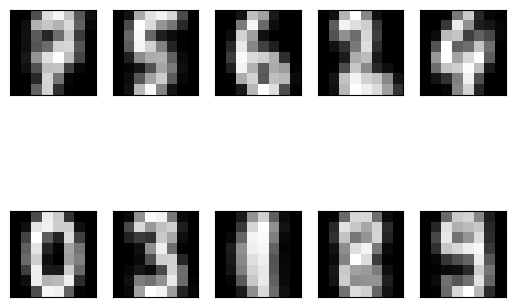

In [52]:
_, axes = plt.subplots(2,5)

for ax, center in zip(axes.ravel(), algorithms[1].cluster_centers_):
    ax.matshow(center.reshape(8,8), cmap="gray")
    ax.set_xticks(())
    ax.set_yticks(())